In [6]:
import sys
import os
import warnings
warnings.filterwarnings("ignore")
sys.path.append(os.path.abspath('Sources'))
import about_ml_models as mlm

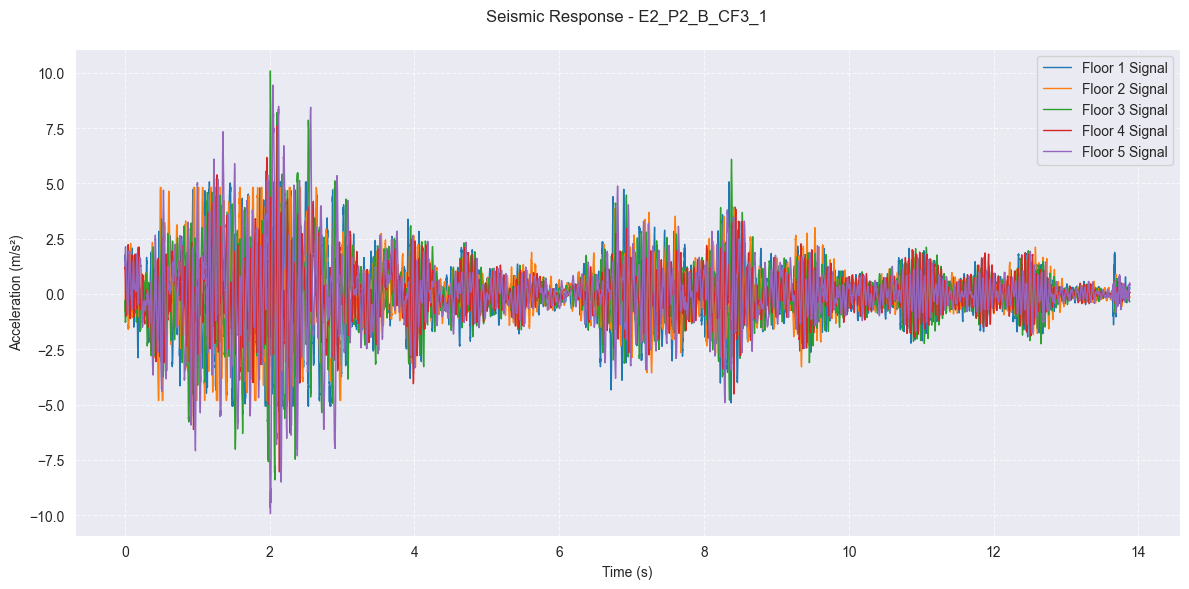


SEISMIC SIGNAL REPORT

GENERAL INFORMATION:
--------------------------------------------------
Signal ID: E2_P2_B_CF3_1
Structure E2: 6 columns, 5 levels
Earthquake B: Cape Mendocino, 4/25/1992, Northern California
Damage Status: Damaged
Damage Location: Floor 2
Damage Severity: Level 1
--------------------------------------------------

INTENSITY MEASURES BY FLOOR:
--------------------------------------------------
+------+-------------------------------+------------+------------+------------+-----------+------------+
| IM   | Description                   |    Floor 1 |    Floor 2 |    Floor 3 |   Floor 4 |    Floor 5 |
+======+===============================+============+============+============+===========+============+
| PGA  | Peak Ground Acceleration      |     4.7003 |     4.2085 |     6.2529 |    4.5195 |     7.2631 |
+------+-------------------------------+------------+------------+------------+-----------+------------+
| PGV  | Peak Ground Velocity          |     0.1932 | 

In [24]:
#falla =True -> para obtener datos con fallas estructurales
#falla =False -> para obtener datos sin fallas estructurales
#falla =None -> selección aleatoria de los datos

data_IM, X_new_scaled=mlm.get_seismic_signals(falla=True)

In [25]:
# Load models
models_det = mlm.load_models()

# Make predictions
results, consensus = mlm.predict_damage(X_new_scaled, models_det)


STRUCTURAL DAMAGE PREDICTION REPORT

Random Forest [1] 100.00%
XGBoost [1] 99.05%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
Neural Network [1] 99.90%
MODEL PREDICTIONS:
--------------------------------------------------
+----------------+--------------+----------------------+
| Model          | Prediction   | Damage Probability   |
+================+==============+======================+
| Random Forest  | Damaged      | 100.00%              |
+----------------+--------------+----------------------+
| XGBoost        | Damaged      | 99.05%               |
+----------------+--------------+----------------------+
| Neural Network | Damaged      | 99.90%               |
+----------------+--------------+----------------------+


CONSENSUS ANALYSIS:
--------------------------------------------------
Model Agreement: 100%
Final Assessment: HIGH PROBABILITY OF DAMAGE
--------------------------------------------------


In [26]:
# damage location prediction
if consensus>0.5:
    mlm.ubicar_falla(data_IM)


STRUCTURAL DAMAGE LOCATION PREDICTION REPORT

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
[[8.7670131e-05 9.9990714e-01 4.8955208e-05 1.1685326e-04]]
1
MODEL PREDICTIONS:
--------------------------------------------------
+----------------+----------------------+--------------+
| Model          | Predicted Location   | Confidence   |
+================+======================+==============+
| Random Forest  | Floor 2              | 97.00%       |
+----------------+----------------------+--------------+
| XGBoost        | Floor 2              | 99.22%       |
+----------------+----------------------+--------------+
| Neural Network | Floor 2              | 99.99%       |
+----------------+----------------------+--------------+


DETAILED PROBABILITY ANALYSIS:
--------------------------------------------------
+----------------+-----------+-----------+-----------+-----------+
| Model          | Floor 1   | Floor 2   | Floor 3   | Floor 4   |
+================+===========+===========+=========